# Лабораторная работа № 3

## Задание
Решите пожалуйста следующую задачу.

1. Примените методы снижения размерности (до двумерного представления
n_components=2) перечисленные ниже для данных находящихся пo
[ссылке](https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view). Здесь - метка (учитель) является столбец / атрибут - `outcome`. Предоставьте результаты, используя следующие ядерные функции:
- PCA
- LDA
- TruncatedSVD
- Kernel PCA (перебрав все ядерные функции - ('linear', 'poly', 'rbf', sigmoid',
'cosine', 'precomputed')

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 30.5MB/s]


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##  О датасете
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек (NIDDK). Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной `Outcome`. Переменные-предикторы включают количество беременностей, которые были у пациентки, её индекс массы тела `BMI`, уровень инсулина, возраст и так далее. Всего в датасете 9 переменных:
- `Pregnancies` - количество беременностей;
- `Glucose` - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе;
- `BloodPressure` - диастолическое артериальное давление (мм рт. ст.);
- `SkinThickness` - толщина кожной складки трицепса (мм);
- `Insulin` - 2-часовой сывороточный инсулин (мкЕд/мл);
- `BMI` - Индекс массы тела (вес в кг/(рост в м)^2);
- `DiabetesPedigreeFunction` - функция оценки вероятности диабета на основе семейного анамнеза;
- `Age` - возраст (лет);
- `Outcome` - целевая переменная (0 или 1) 268 из 768 — 1 (больны), остальные — 0 (здоровы).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Подготовка данных

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Features (X) after scaling:\n", X[:5])
print("Target (y) first 5 values:\n", y[:5])

Features (X) after scaling:
 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]
Target (y) first 5 values:
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


## Метод PCA

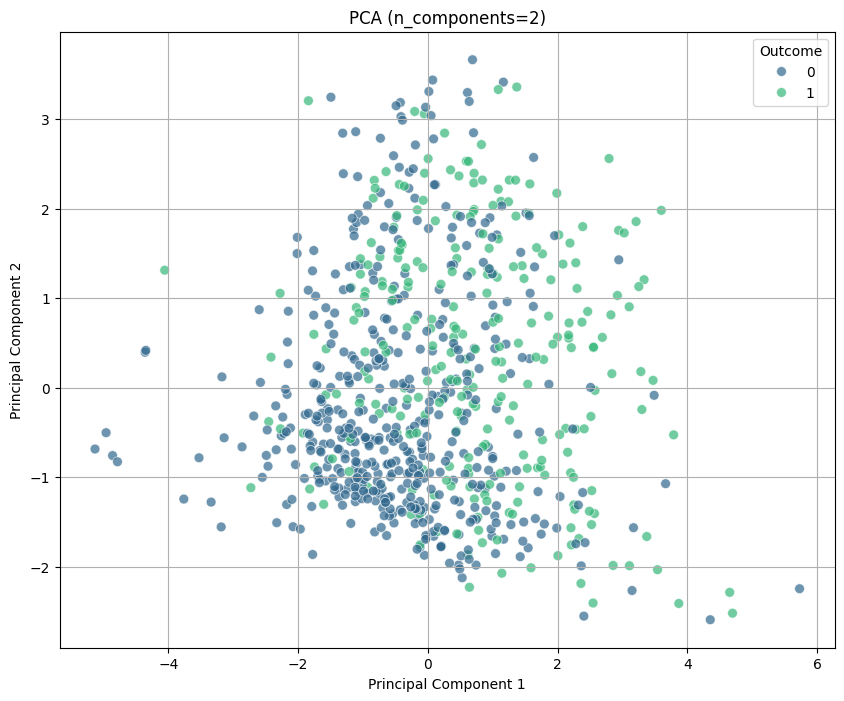

Shape of X_pca: (768, 2)
First 5 rows of X_pca:
 [[ 1.06850273  1.23489499]
 [-1.12168331 -0.73385167]
 [-0.39647671  1.59587594]
 [-1.11578081 -1.27124099]
 [ 2.35933421 -2.18481921]]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Outcome',
    data=pca_df,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('PCA (n_components=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Outcome')
plt.grid(True)
plt.show()

print("Shape of X_pca:", X_pca.shape)
print("First 5 rows of X_pca:\n", X_pca[:5])

## Метод LDA

Использование LDA при размерности n_components=2 невозможно, так как оно может проецировать данные только на одно измерение (n_components=1)

## Метод TruncatedSVD

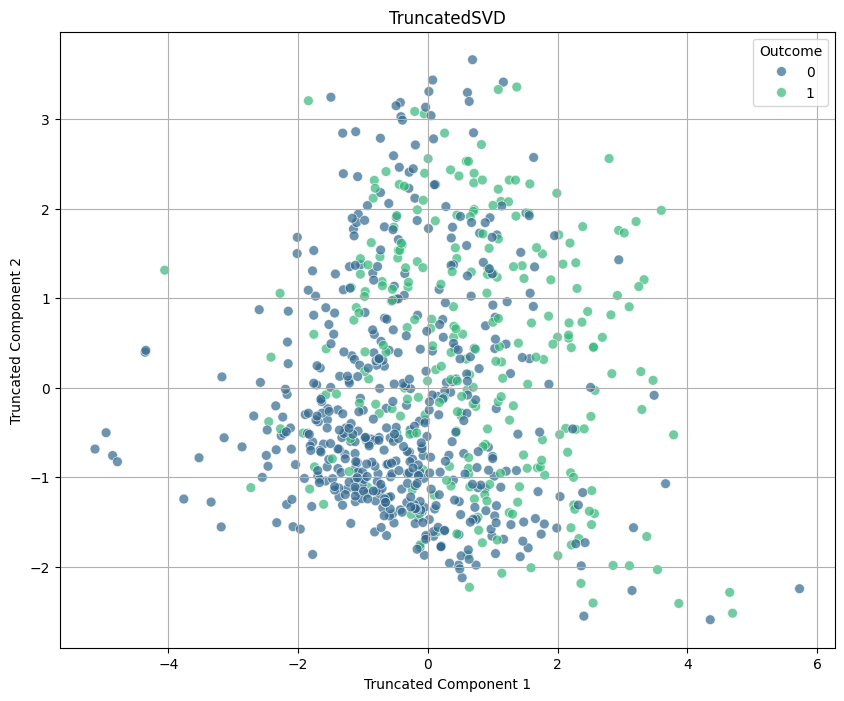

Shape of X_tsvd: (768, 2)
First 5 rows of X_tsvd:
 [[ 1.06850273  1.23489499]
 [-1.12168331 -0.73385167]
 [-0.39647671  1.59587594]
 [-1.11578081 -1.27124099]
 [ 2.35933421 -2.18481921]]


In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=2)
X_tsvd = tsvd.fit_transform(X)
tsvd_df = pd.DataFrame(data=X_tsvd, columns=['Truncated Component 1', 'Truncated Component 2'])
tsvd_df['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Truncated Component 1',
    y='Truncated Component 2',
    hue='Outcome',
    data=tsvd_df,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('TruncatedSVD')
plt.xlabel('Truncated Component 1')
plt.ylabel('Truncated Component 2')
plt.legend(title='Outcome')
plt.grid(True)
plt.show()

print("Shape of X_tsvd:", X_tsvd.shape)
print("First 5 rows of X_tsvd:\n", X_tsvd[:5])

## Метод Kernel PCA

###  Ядерная функция `linear`

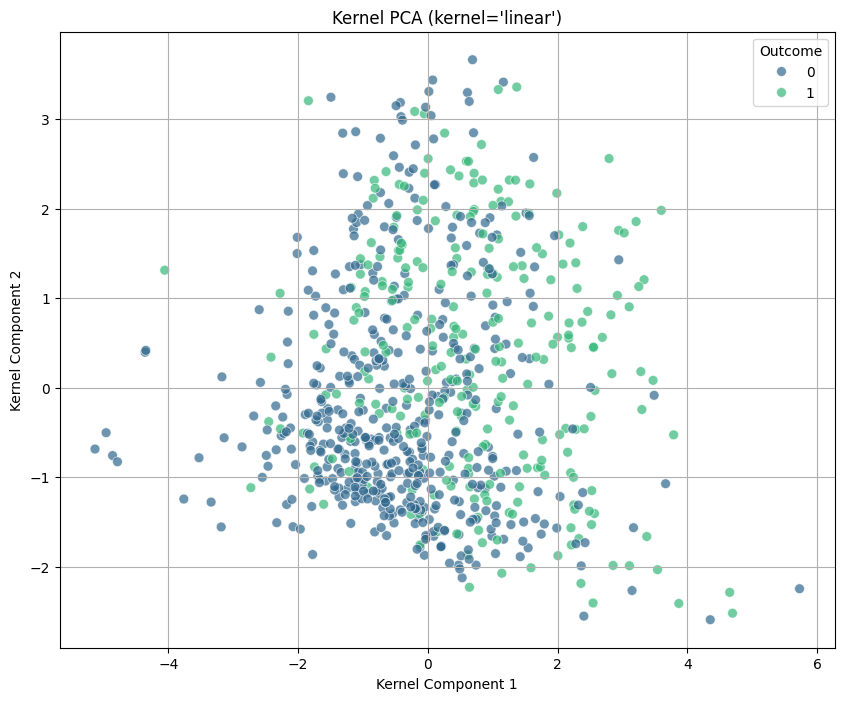

Shape of X_kpca_linear: (768, 2)
First 5 rows of X_kpca_linear:
 [[ 1.06850273  1.23489499]
 [-1.12168331 -0.73385167]
 [-0.39647671  1.59587594]
 [-1.11578081 -1.27124099]
 [ 2.35933421 -2.18481921]]


In [ ]:
from sklearn.decomposition import KernelPCA

kpca_linear = KernelPCA(n_components=2, kernel='linear')
X_kpca_linear = kpca_linear.fit_transform(X)
kpca_linear_df = pd.DataFrame(data=X_kpca_linear, columns=['Kernel Component 1', 'Kernel Component 2'])
kpca_linear_df['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel Component 1',
    y='Kernel Component 2',
    hue='Outcome',
    data=kpca_linear_df,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title("Kernel PCA (kernel='linear')")
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.legend(title='Outcome')
plt.grid(True)
plt.show()

print("Shape of X_kpca_linear:", X_kpca_linear.shape)
print("First 5 rows of X_kpca_linear:\n", X_kpca_linear[:5])

###  Ядерная функция `poly`

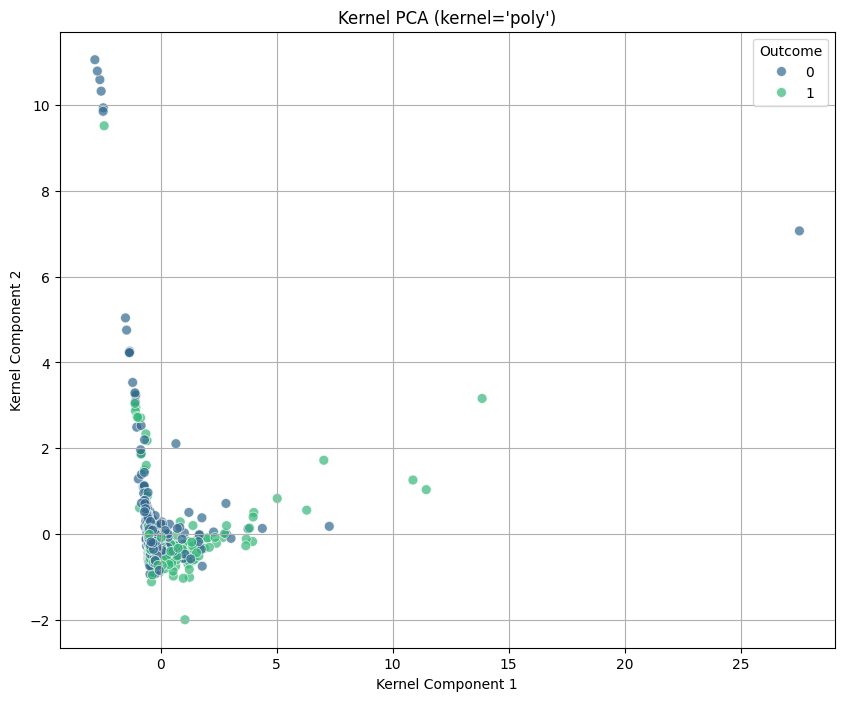

Shape of X_kpca_poly: (768, 2)
First 5 rows of X_kpca_poly:
 [[-1.36015020e-01 -5.66377882e-01]
 [-4.66486792e-01 -2.00007779e-02]
 [-3.84468885e-01  1.04628664e-03]
 [-4.52374939e-01  8.72314917e-03]
 [ 7.03121654e+00  1.71861502e+00]]


In [ ]:
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3)
X_kpca_poly = kpca_poly.fit_transform(X)
kpca_poly_df = pd.DataFrame(data=X_kpca_poly, columns=['Kernel Component 1', 'Kernel Component 2'])
kpca_poly_df['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel Component 1',
    y='Kernel Component 2',
    hue='Outcome',
    data=kpca_poly_df,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title("Kernel PCA (kernel='poly')")
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.legend(title='Outcome')
plt.grid(True)
plt.show()

print("Shape of X_kpca_poly:", X_kpca_poly.shape)
print("First 5 rows of X_kpca_poly:\n", X_kpca_poly[:5])

###  Ядерная функция `rbf`

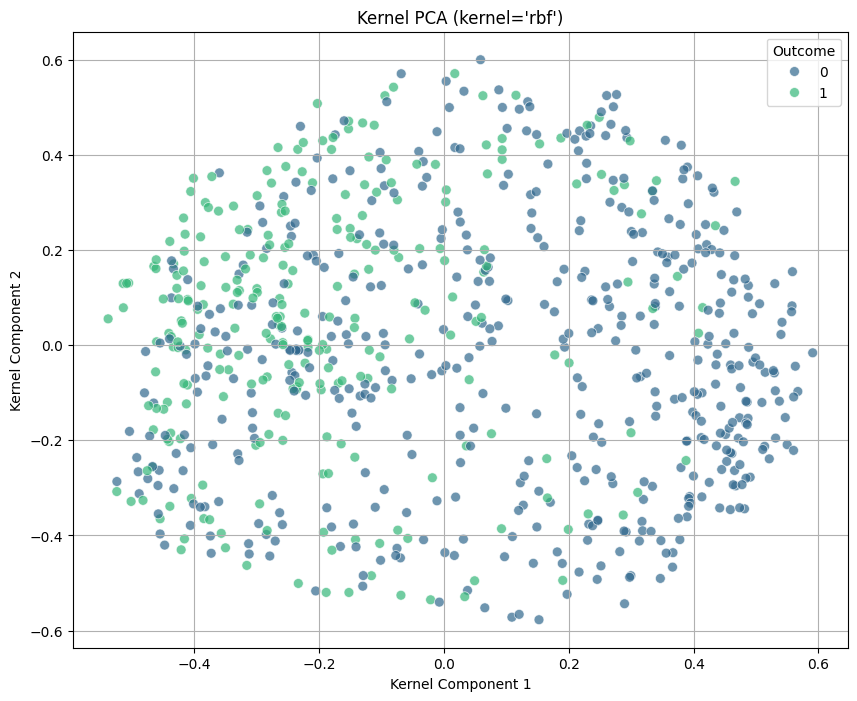

Shape of X_kpca_rbf: (768, 2)
First 5 rows of X_kpca_rbf:
 [[-0.38562027  0.08508466]
 [ 0.4750535  -0.08933368]
 [-0.30144303 -0.21057116]
 [ 0.56289    -0.04445383]
 [-0.26241544  0.0599559 ]]


In [ ]:
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=None)
X_kpca_rbf = kpca_rbf.fit_transform(X)
kpca_rbf_df = pd.DataFrame(data=X_kpca_rbf, columns=['Kernel Component 1', 'Kernel Component 2'])
kpca_rbf_df['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel Component 1',
    y='Kernel Component 2',
    hue='Outcome',
    data=kpca_rbf_df,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title("Kernel PCA (kernel='rbf')")
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.legend(title='Outcome')
plt.grid(True)
plt.show()

print("Shape of X_kpca_rbf:", X_kpca_rbf.shape)
print("First 5 rows of X_kpca_rbf:\n", X_kpca_rbf[:5])

###  Ядерная функция `sigmoid`

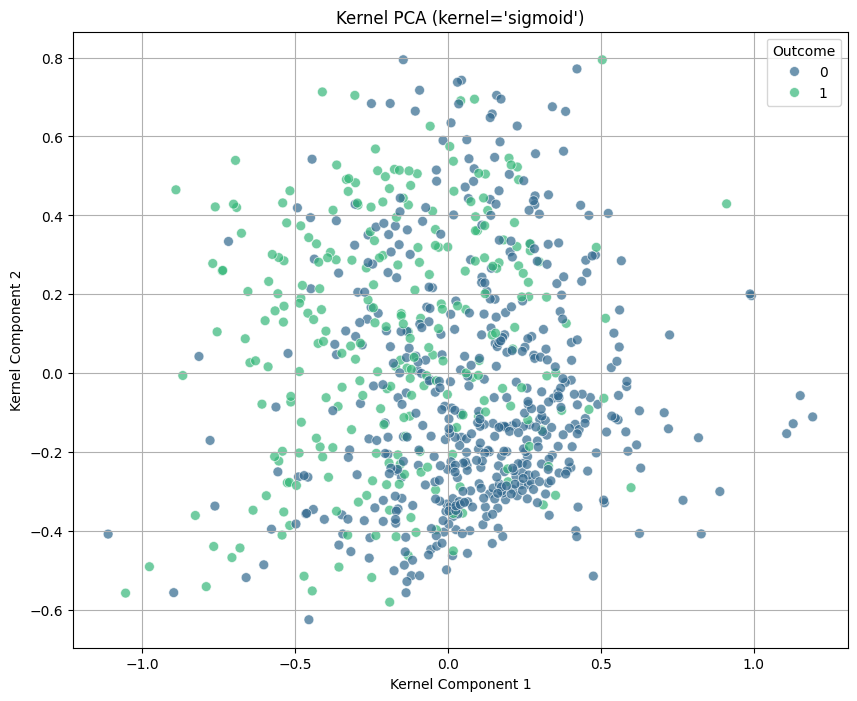

Shape of X_kpca_sigmoid: (768, 2)
First 5 rows of X_kpca_sigmoid:
 [[-0.26657115  0.26687044]
 [ 0.25768669 -0.16880087]
 [ 0.09025704  0.39666942]
 [ 0.25951716 -0.31805144]
 [-0.47023046 -0.51403189]]


In [ ]:
kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid')
X_kpca_sigmoid = kpca_sigmoid.fit_transform(X)
kpca_sigmoid_df = pd.DataFrame(data=X_kpca_sigmoid, columns=['Kernel Component 1', 'Kernel Component 2'])
kpca_sigmoid_df['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel Component 1',
    y='Kernel Component 2',
    hue='Outcome',
    data=kpca_sigmoid_df,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title("Kernel PCA (kernel='sigmoid')")
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.legend(title='Outcome')
plt.grid(True)
plt.show()

print("Shape of X_kpca_sigmoid:", X_kpca_sigmoid.shape)
print("First 5 rows of X_kpca_sigmoid:\n", X_kpca_sigmoid[:5])

###  Ядерная функция `cosine`

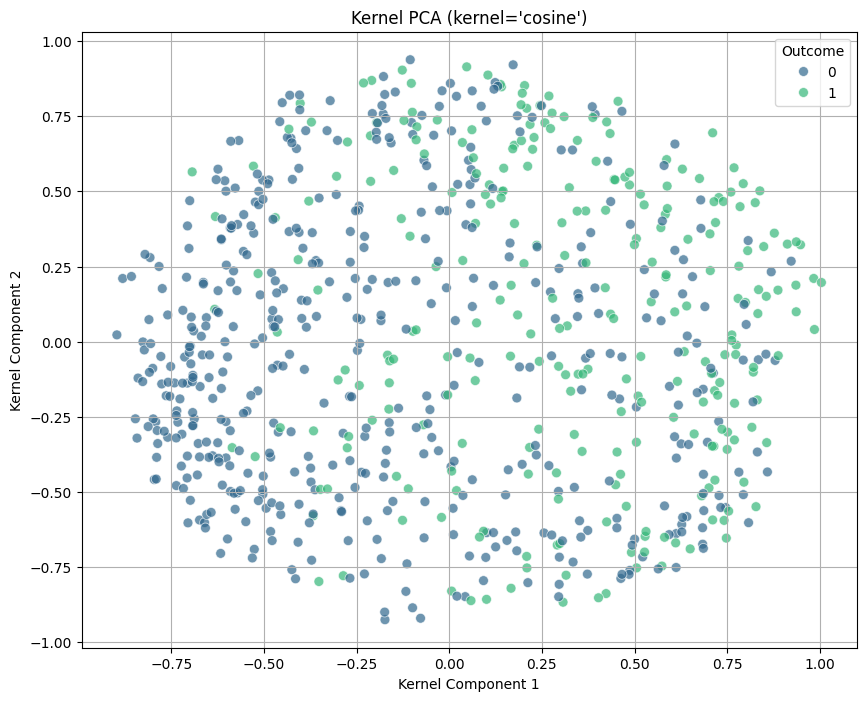

Shape of X_kpca_cosine: (768, 2)
First 5 rows of X_kpca_cosine:
 [[ 8.32528293e-01  9.34997402e-02]
 [-6.71964576e-01 -1.49225133e-01]
 [ 4.48999126e-01 -4.76009313e-01]
 [-8.26141341e-01 -8.30263866e-04]
 [ 9.76951821e-02  4.89351027e-01]]


In [ ]:
kpca_cosine = KernelPCA(n_components=2, kernel='cosine')

X_kpca_cosine = kpca_cosine.fit_transform(X)
kpca_cosine_df = pd.DataFrame(data=X_kpca_cosine, columns=['Kernel Component 1', 'Kernel Component 2'])
kpca_cosine_df['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel Component 1',
    y='Kernel Component 2',
    hue='Outcome',
    data=kpca_cosine_df,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title("Kernel PCA (kernel='cosine')")
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.legend(title='Outcome')
plt.grid(True)
plt.show()

print("Shape of X_kpca_cosine:", X_kpca_cosine.shape)
print("First 5 rows of X_kpca_cosine:\n", X_kpca_cosine[:5])

###  Ядерная функция `precomputed`

Shape of precomputed kernel matrix K: (768, 768)
First 5x5 rows/columns of K:
 [[1.         0.27157906 0.26523853 0.14497609 0.00996603]
 [0.27157906 1.         0.10317193 0.78933297 0.00340943]
 [0.26523853 0.10317193 1.         0.08950278 0.00304805]
 [0.14497609 0.78933297 0.08950278 1.         0.00174005]
 [0.00996603 0.00340943 0.00304805 0.00174005 1.        ]]


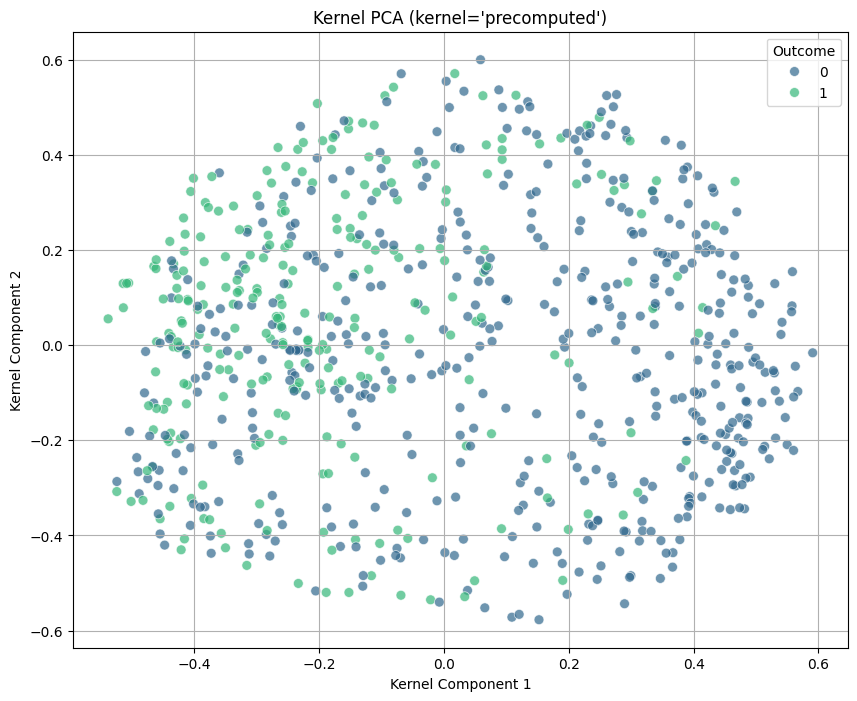

Shape of X_kpca_precomputed: (768, 2)
First 5 rows of X_kpca_precomputed:
 [[-0.38562027  0.08508466]
 [ 0.4750535  -0.08933368]
 [-0.30144303 -0.21057116]
 [ 0.56289    -0.04445383]
 [-0.26241544  0.0599559 ]]


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

K = rbf_kernel(X, gamma=None)
print("Shape of precomputed kernel matrix K:", K.shape)
print("First 5x5 rows/columns of K:\n", K[:5, :5])

kpca_precomputed = KernelPCA(n_components=2, kernel='precomputed')
X_kpca_precomputed = kpca_precomputed.fit_transform(K)
kpca_precomputed_df = pd.DataFrame(data=X_kpca_precomputed, columns=['Kernel Component 1', 'Kernel Component 2'])
kpca_precomputed_df['Outcome'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Kernel Component 1',
    y='Kernel Component 2',
    hue='Outcome',
    data=kpca_precomputed_df,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title("Kernel PCA (kernel='precomputed')")
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.legend(title='Outcome')
plt.grid(True)
plt.show()

print("Shape of X_kpca_precomputed:", X_kpca_precomputed.shape)
print("First 5 rows of X_kpca_precomputed:\n", X_kpca_precomputed[:5])